## ベイズ因子比較

In [1]:
import numpy as np
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


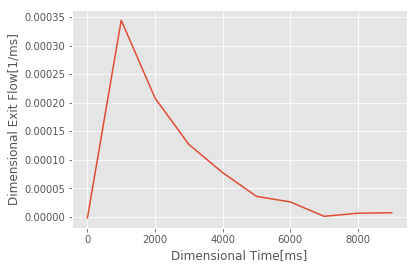

In [2]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [3]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [4]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [5]:
def energy(model, diffusivity_0, diffusivity_1, k_a, k_d, std,
           epsilon=epsilon, length=length, 
           time=dimensional_time, artificial_flow=dimensional_exit_flow):
    
    Energy = np.square(artificial_flow - ((1.-model)*Flow(diffusivity=diffusivity_0,
                                                     k_a=0., k_d=0.,
                                                     epsilon=epsilon, length=length, 
                                                     time=time) + \
                                          model*Flow(diffusivity=diffusivity_1,
                                                     k_a=k_a, k_d=k_d, 
                                                     epsilon=epsilon, length=length, 
                                                     time=time))
                      ).sum()
    
    Energy *= 1./(2.*std**2)
    Energy += (time.shape[0]/2.) * np.log(2.*np.pi*std**2) 
    
    return Energy


def dlog_p(model, diffusivity_0, diffusivity_1, k_a, k_d, 
           std, time=dimensional_time, artificial_flow=dimensional_exit_flow, 
           epsilon=epsilon, length=length):
    
    dlogp = -1./(std**2) \
            *(
                 (Flow(diffusivity=diffusivity_0, k_a=0, k_d=0, time=time, epsilon=epsilon, length=length) \
                  - Flow(diffusivity=diffusivity_1, k_a=k_a, k_d=k_d, time=time, epsilon=epsilon, length=length)) \
                 *(artificial_flow - (1-model)*Flow(diffusivity=diffusivity_0,
                                                    k_a=0, k_d=0,
                                                    time=time, epsilon=epsilon, length=length) \
                   - model*Flow(diffusivity=diffusivity_1, 
                                k_a=k_a, k_d=k_d, 
                                time=time, epsilon=epsilon, length=length)\
                   )
              ).sum()
           
    return dlogp

## Path1

## 交換なし

In [6]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
time_n = 204800
# Temp = np.array([1, 2, 3, 4, 5], dtype=float)
# beta = 1/Temp
# print(beta)
model = 0.1*np.arange(0, 11, dtype=float)
print(model)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [74]:
de0_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T1_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T5_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T10_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20_n = ['zero', 'one', 'two', 'three', 'four']

In [75]:
for i in range(5):
#     r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T1_n[i], de1_one_T1_n[i], ka_one_T1_n[i], kd_one_T1_n[i], sigma_one_T1_n[i], energy_one_T1_n[i], dlogp_one_T1_n[i],\
    pick_one_T1_n[i], update_one_T1_n[i], exchange_one_T1_n[i] = file_output_one(r_file, time_n, model)

In [76]:
for i in range(5):
#    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T5_n[i], de1_one_T5_n[i], ka_one_T5_n[i], kd_one_T5_n[i], sigma_one_T5_n[i], energy_one_T5_n[i], dlogp_one_T5_n[i],\
    pick_one_T5_n[i], update_one_T5_n[i], exchange_one_T5_n[i] = file_output_one(r_file, time_n, model)
       
#    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T10_n[i], de1_one_T10_n[i], ka_one_T10_n[i], kd_one_T10_n[i], sigma_one_T10_n[i], energy_one_T10_n[i], dlogp_one_T10_n[i],\
    pick_one_T10_n[i], update_one_T10_n[i], exchange_one_T10_n[i] = file_output_one(r_file, time_n, model)
    
#    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20_n[i], de1_one_T20_n[i], ka_one_T20_n[i], kd_one_T20_n[i], sigma_one_T20_n[i], energy_one_T20_n[i], dlogp_one_T20_n[i],\
    pick_one_T20_n[i], update_one_T20_n[i], exchange_one_T20_n[i] = file_output_one(r_file, time_n, model)

In [77]:
print(dlogp_one_T1_n[4])

[[  4.24463204e+03   1.95121012e+02   1.95121012e+02 ...,   1.26439021e+01
    8.50531180e+01   2.09996387e+02]
 [  4.18439416e+03   4.18439416e+03   5.01268300e+03 ...,  -1.25599770e+01
   -1.23445168e+01  -1.21289683e+01]
 [  4.12415627e+03   4.98652055e+03   4.98652055e+03 ...,  -5.62351421e+00
   -7.30964378e+00  -7.30964378e+00]
 ..., 
 [  3.76272896e+03   3.77645698e+03   6.24058153e+03 ...,   7.92522456e+00
   -1.29864555e+00  -1.29864555e+00]
 [  3.70249108e+03   3.70249108e+03   6.32125196e+03 ...,   4.98777113e+01
    5.38024919e+01   4.96086132e+01]
 [  3.64225319e+03   3.64225319e+03   5.38459598e+03 ...,  -1.00821033e+02
   -8.23906060e+01  -3.53653209e+01]]


In [96]:
print("Temp=1", update_one_T1_n[0].sum(axis=1)/time_n)
print("Temp=5", update_one_T5_n[0].sum(axis=1)/time_n)
print("Temp=10", update_one_T10_n[0].sum(axis=1)/time_n)
print("Temp=20", update_one_T20_n[0].sum(axis=1)/time_n)

Temp=1 [ 0.79130371  0.75252441  0.67054199  0.58574219  0.58429688  0.50740723
  0.44375488  0.44222656  0.48253418  0.60834961  0.5311084 ]
Temp=5 [ 0.9907959   0.99083496  0.98294922  0.99081055  0.98935547  0.9842627
  0.99062988  0.98751465  0.98953613  0.99025879  0.99602539]
Temp=10 [ 0.99119629  0.99278809  0.99716797  0.99462402  0.99328613  0.9955127
  0.99605957  0.9938623   0.9900293   0.99420898  0.99179688]
Temp=20 [ 0.99719727  0.99562988  0.99603027  0.99605957  0.99720215  0.99518066
  0.99713867  0.99458008  0.99640625  0.99603027  0.99626953]


In [37]:
def fig_energy(start, energy):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    end = 2*start

    energy_m = np.zeros(11, dtype=float)
    energy_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = energy[j][i][start:end].mean()
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<Eenrgy>$')

    #plt.savefig('teireikai_20190220_BayesFactorPath1.png')

    plt.show()
    
    return energy_m, energy_s

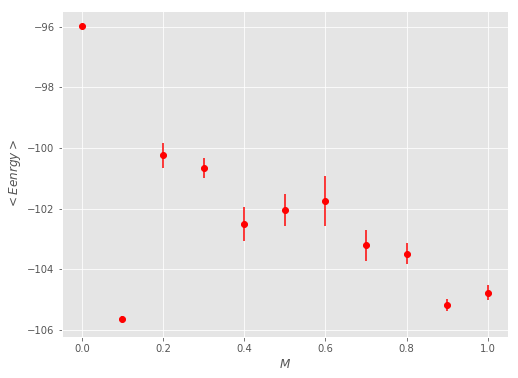

In [79]:
energy_m_T1_n, energy_s_T1_n = fig_energy(102400, energy_one_T1_n)

In [39]:
def fig_dE(start, dlogp):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    #plt.savefig('teireikai_20190220_BayesFactorPath1.png')

    plt.show()
    
    return dlogp_m, dlogp_s

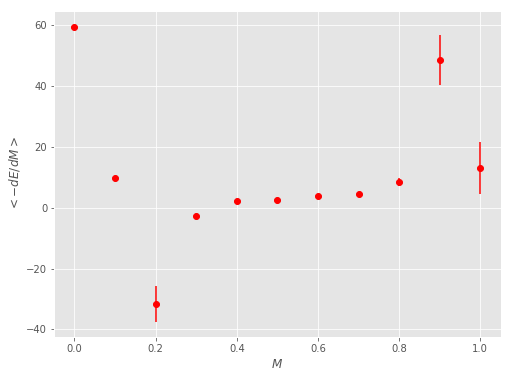

In [80]:
dlogp_m_T1_n, dlogp_s_T1_n = fig_dE(102400, dlogp_one_T1_n)

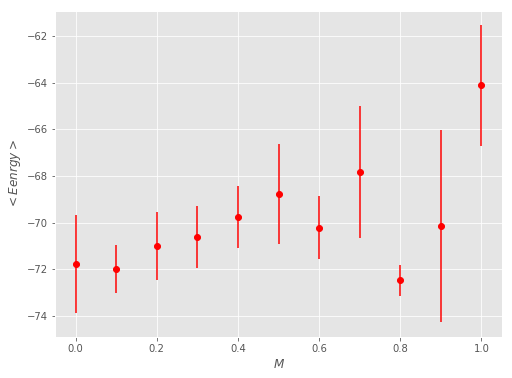

In [81]:
energy_m_T5_n, energy_s_T5_n = fig_energy(102400, energy_one_T5_n)

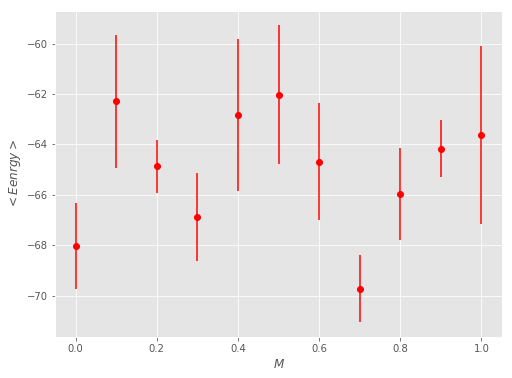

In [82]:
energy_m_T10_n, energy_s_T10_n = fig_energy(102400, energy_one_T10_n)

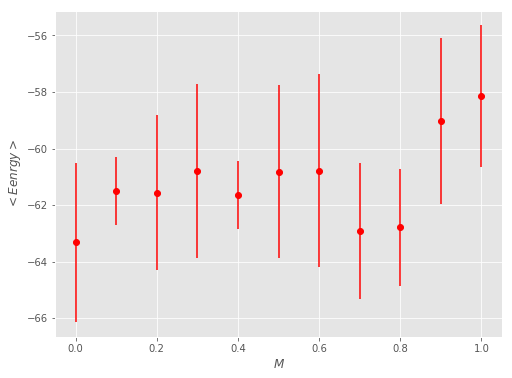

In [83]:
energy_m_T20_n, energy_s_T20_n = fig_energy(102400, energy_one_T20_n)

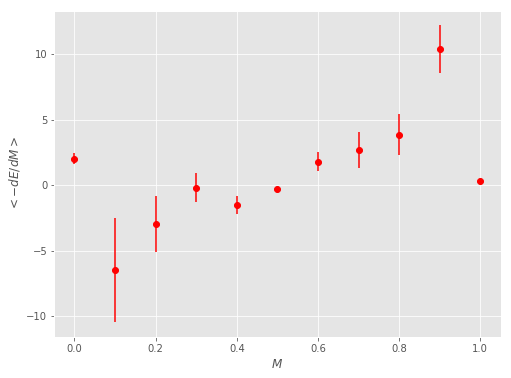

In [84]:
dlogp_m_T5_n, dlogp_s_T5_n = fig_dE(102400, dlogp_one_T5_n)

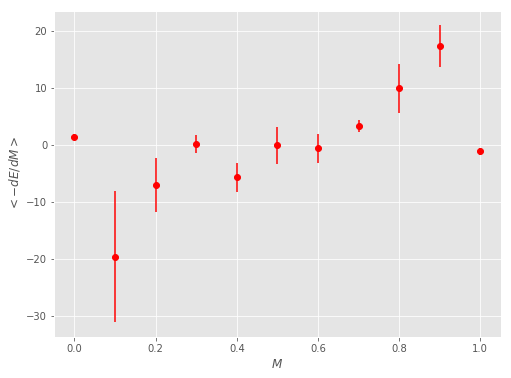

In [85]:
dlogp_m_T10_n, dlogp_s_T10_n = fig_dE(102400, dlogp_one_T10_n)

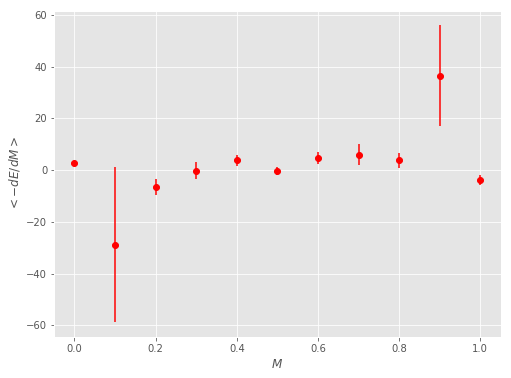

In [86]:
dlogp_m_T20_n, dlogp_s_T20_n = fig_dE(102400, dlogp_one_T20_n)

In [97]:
print(dlogp_m_T20_n[5])

-0.501682628124


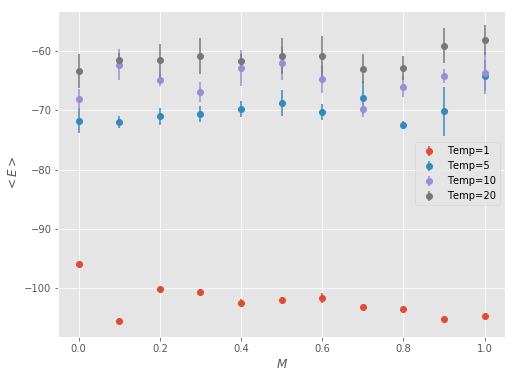

In [87]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T1_n, yerr=energy_s_T1_n, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, energy_m_T5_n, yerr=energy_s_T5_n, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, energy_m_T10_n, yerr=energy_s_T10_n, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, energy_m_T20_n, yerr=energy_s_T20_n, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

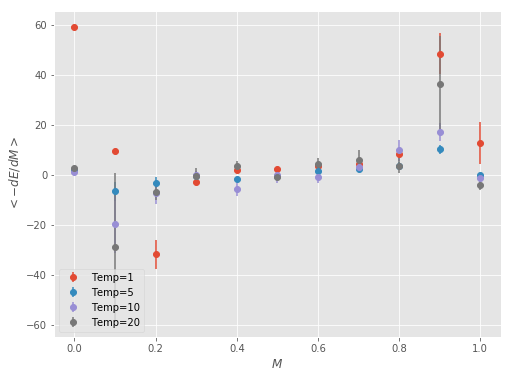

In [88]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1_n, yerr=dlogp_s_T1_n, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, dlogp_m_T5_n, yerr=dlogp_s_T5_n, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, dlogp_m_T10_n, yerr=dlogp_s_T10_n, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, dlogp_m_T20_n, yerr=dlogp_s_T20_n, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

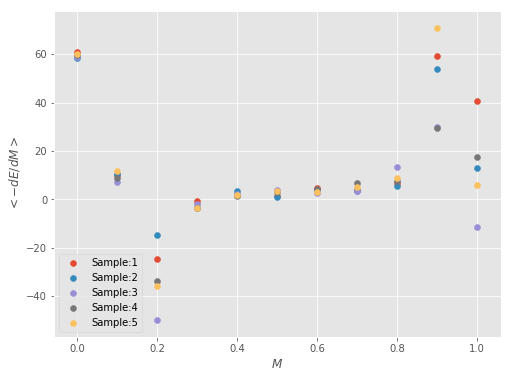

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

start = 102400
end = 2*start

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
#ax.set_xlim(0.49, 0.51)
#ax.set_ylim(1.96, 2)
plt.show()

In [90]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)

In [91]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[ 10.79479289   7.9596222   13.57421999  12.71870156   6.77184448
   6.00853274  11.44695863   5.60015723  12.0381691    6.35316085]
10
9.32661596772 0.97573583106
8.35088013666 10.3023517988


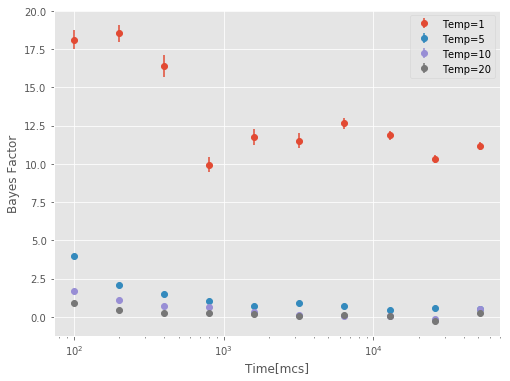

In [113]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
#ax.set_ylim(-0.5, .5)
plt.show()

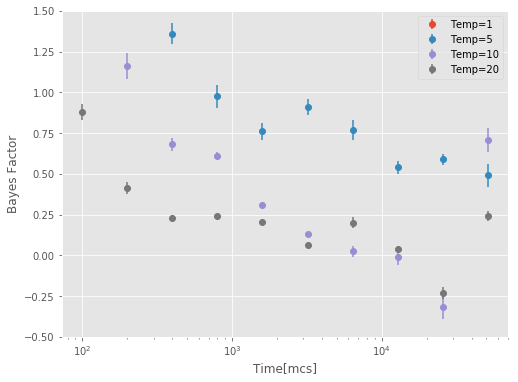

In [114]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
ax.set_ylim(-0.5, 1.5)
plt.show()

## 交換あり

In [54]:
de0_one_T1 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T1 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T1 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T1 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T1 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T1 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T1 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T1 = ['zero', 'one', 'two', 'three', 'four']
update_one_T1 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T1 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T5 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T5 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T5 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T5 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T5 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T5 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T5 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T5 = ['zero', 'one', 'two', 'three', 'four']
update_one_T5 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T5 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T10 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T10 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T10 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T10 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T10 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T10 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T10 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T10 = ['zero', 'one', 'two', 'three', 'four']
update_one_T10 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T10 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T20 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20 = ['zero', 'one', 'two', 'three', 'four']
update_one_T20 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20 = ['zero', 'one', 'two', 'three', 'four']

In [57]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T1[i], de1_one_T1[i], ka_one_T1[i], kd_one_T1[i], sigma_one_T1[i], energy_one_T1[i], dlogp_one_T1[i],\
    pick_one_T1[i], update_one_T1[i], exchange_one_T1[i] = file_output_one(r_file, time, model)

In [58]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T5[i], de1_one_T5[i], ka_one_T5[i], kd_one_T5[i], sigma_one_T5[i], energy_one_T5[i], dlogp_one_T5[i],\
    pick_one_T5[i], update_one_T5[i], exchange_one_T5[i] = file_output_one(r_file, time, model)
       
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T10[i], de1_one_T10[i], ka_one_T10[i], kd_one_T10[i], sigma_one_T10[i], energy_one_T10[i], dlogp_one_T10[i],\
    pick_one_T10[i], update_one_T10[i], exchange_one_T10[i] = file_output_one(r_file, time, model)
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20[i], de1_one_T20[i], ka_one_T20[i], kd_one_T20[i], sigma_one_T20[i], energy_one_T20[i], dlogp_one_T20[i],\
    pick_one_T20[i], update_one_T20[i], exchange_one_T20[i] = file_output_one(r_file, time, model)

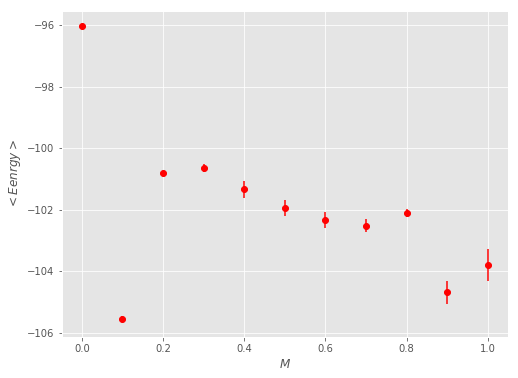

In [59]:
energy_m_T1, energy_s_T1 = fig_energy(51200, energy_one_T1)

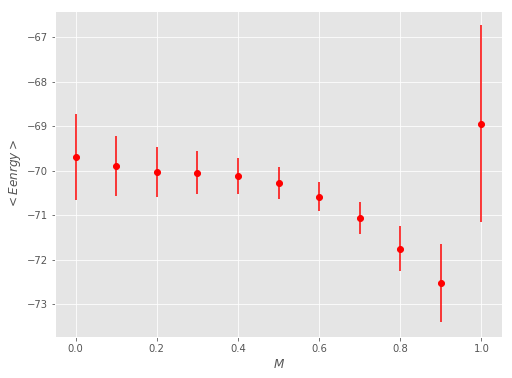

In [60]:
energy_m_T5, energy_s_T5 = fig_energy(51200, energy_one_T5)

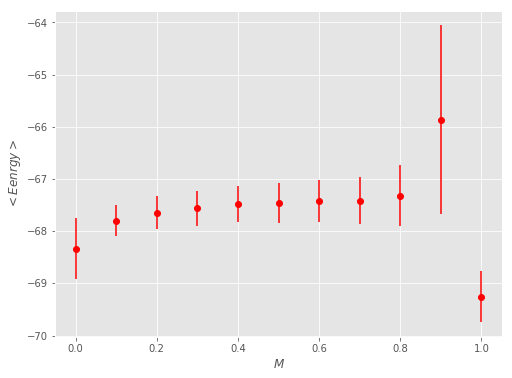

In [62]:
energy_m_T10, energy_s_T10 = fig_energy(51200, energy_one_T10)

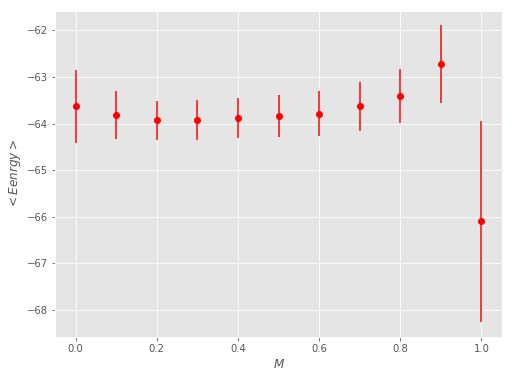

In [63]:
energy_m_T20, energy_s_T20 = fig_energy(51200, energy_one_T20)

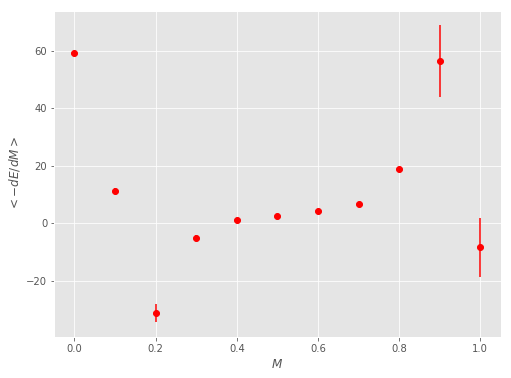

In [61]:
dlogp_m_T1, dlogp_s_T1 = fig_dE(51200, dlogp_one_T1)

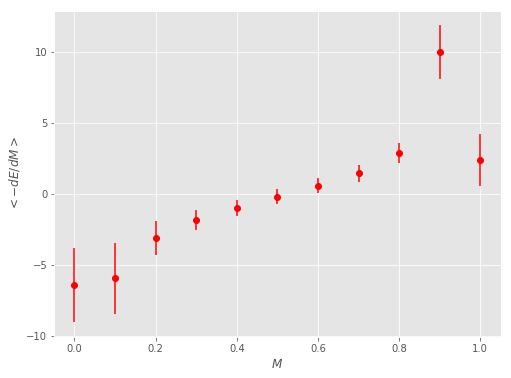

In [64]:
dlogp_m_T5, dlogp_s_T5 = fig_dE(51200, dlogp_one_T5)

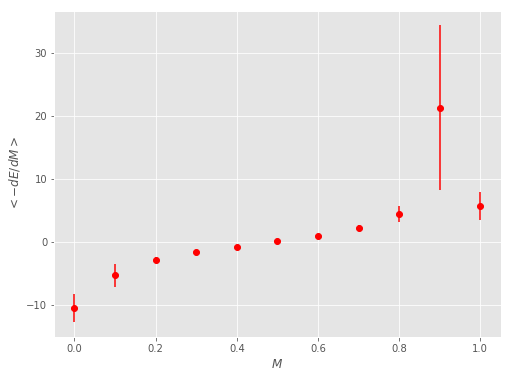

In [65]:
dlogp_m_T10, dlogp_s_T10 = fig_dE(51200, dlogp_one_T10)

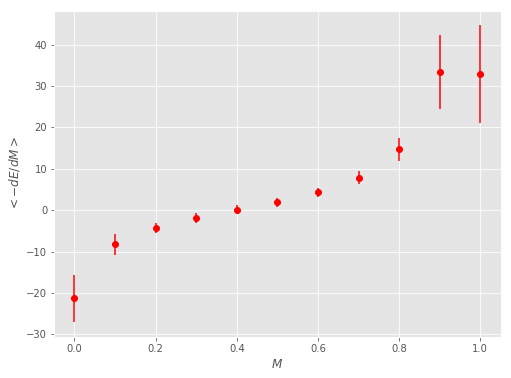

In [66]:
dlogp_m_T20, dlogp_s_T20 = fig_dE(51200, dlogp_one_T20)

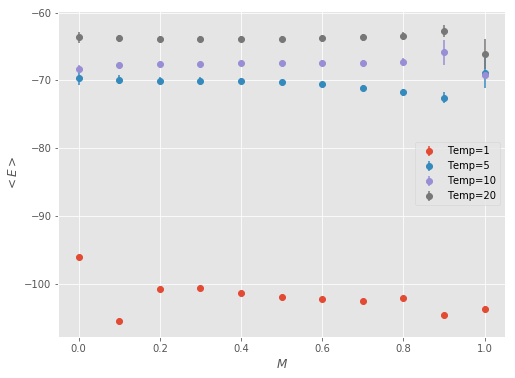

In [67]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T1, yerr=energy_s_T1, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, energy_m_T5, yerr=energy_s_T5, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, energy_m_T10, yerr=energy_s_T10, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, energy_m_T20, yerr=energy_s_T20, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

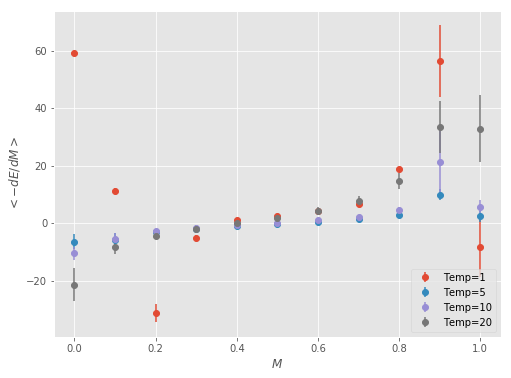

In [68]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1, yerr=dlogp_s_T1, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, dlogp_m_T5, yerr=dlogp_s_T5, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, dlogp_m_T10, yerr=dlogp_s_T10, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, dlogp_m_T20, yerr=dlogp_s_T20, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

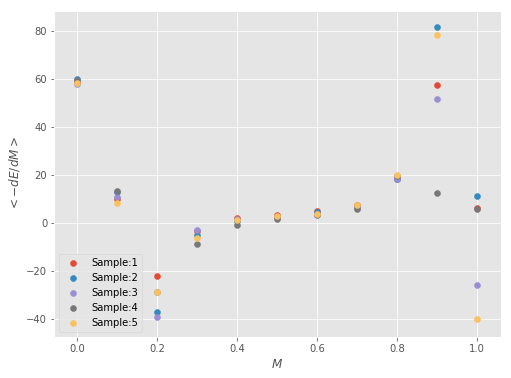

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

start = 51200
end = 2*start

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
#ax.set_xlim(0.49, 0.51)
#ax.set_ylim(1.96, 2)
plt.show()

In [70]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)

In [71]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[  5.06111249  15.47650293   8.6761507   11.62041505  10.97277072
  14.85497851   5.03244012  13.98979142   9.74639716   5.90984803]
10
10.134040712 1.24939625594
8.88464445602 11.3834369679


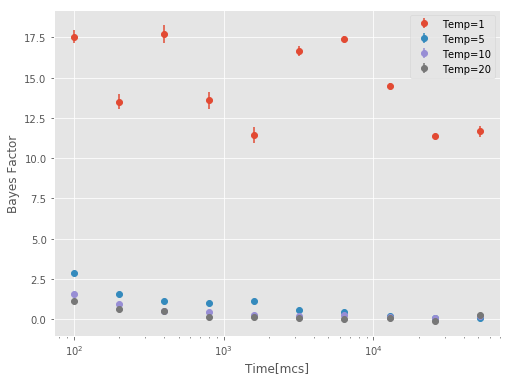

In [94]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
#ax.set_ylim(-0.5, .5)
plt.show()

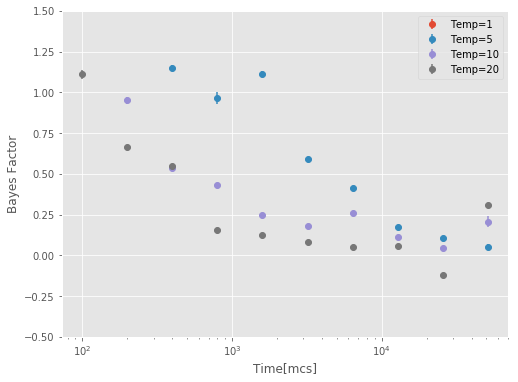

In [95]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
ax.set_ylim(-0.5, 1.5)
plt.show()

## 交換ありなし比較

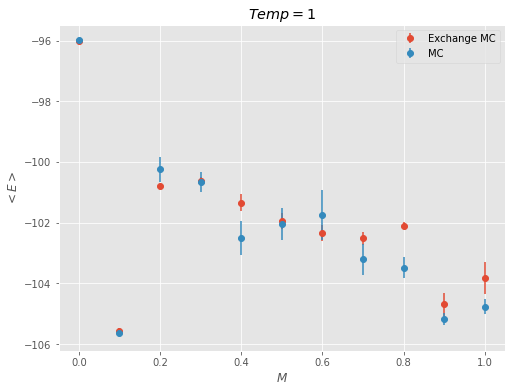

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T1, yerr=energy_s_T1, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T1_n, yerr=energy_s_T1_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=1$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

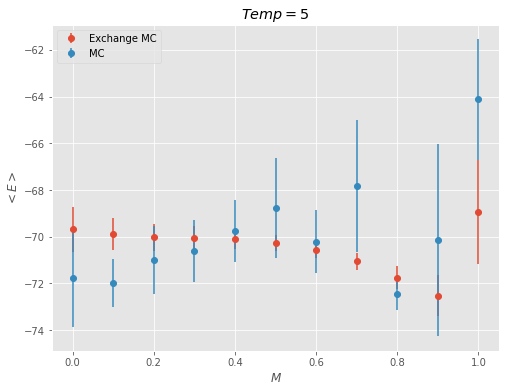

In [104]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T5, yerr=energy_s_T5, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T5_n, yerr=energy_s_T5_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=5$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

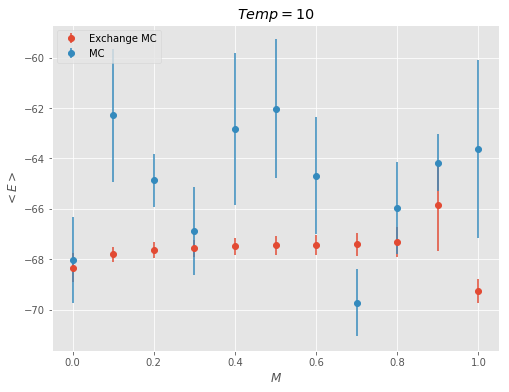

In [105]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T10, yerr=energy_s_T10, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T10_n, yerr=energy_s_T10_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=10$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

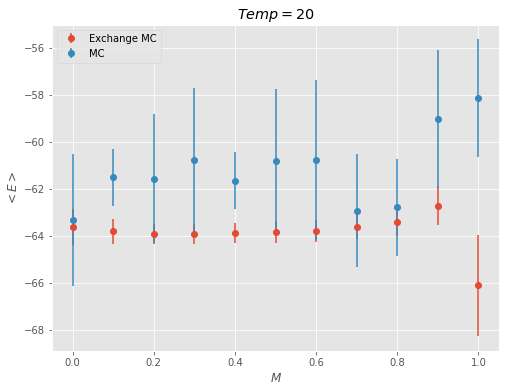

In [106]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T20, yerr=energy_s_T20, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T20_n, yerr=energy_s_T20_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

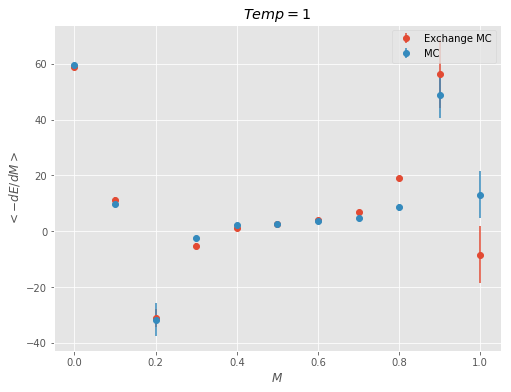

In [107]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1, yerr=dlogp_s_T1, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T1_n, yerr=dlogp_s_T1_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=1$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

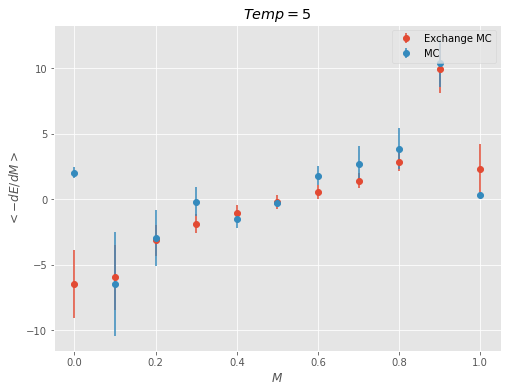

In [109]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T5, yerr=dlogp_s_T5, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T5_n, yerr=dlogp_s_T5_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=5$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

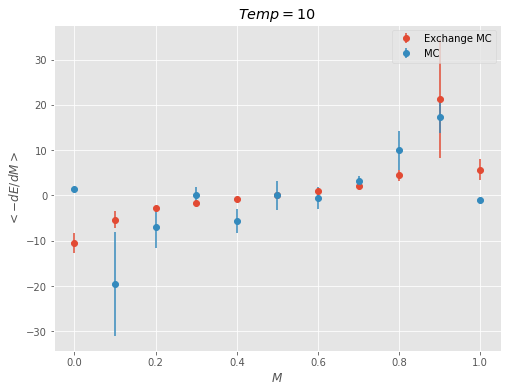

In [110]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T10, yerr=dlogp_s_T10, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T10_n, yerr=dlogp_s_T10_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=10$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

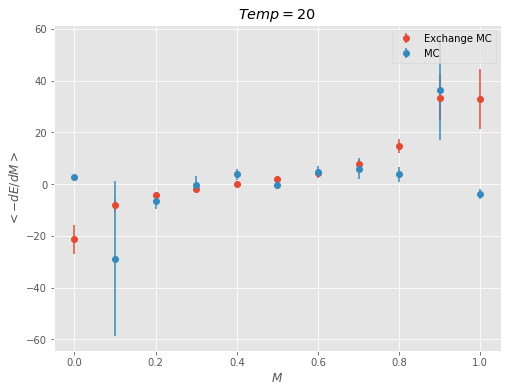

In [111]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T20, yerr=dlogp_s_T20, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T20_n, yerr=dlogp_s_T20_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
#ax.set_ylim(-0.5, .5)
plt.show()